<a href="https://colab.research.google.com/github/Jktu1983/data-analysis.ipynb/blob/main/HW_1_%C2%AB%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B%2C_%D0%BE%D0%B1%D1%89%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D1%8F%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

In [20]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

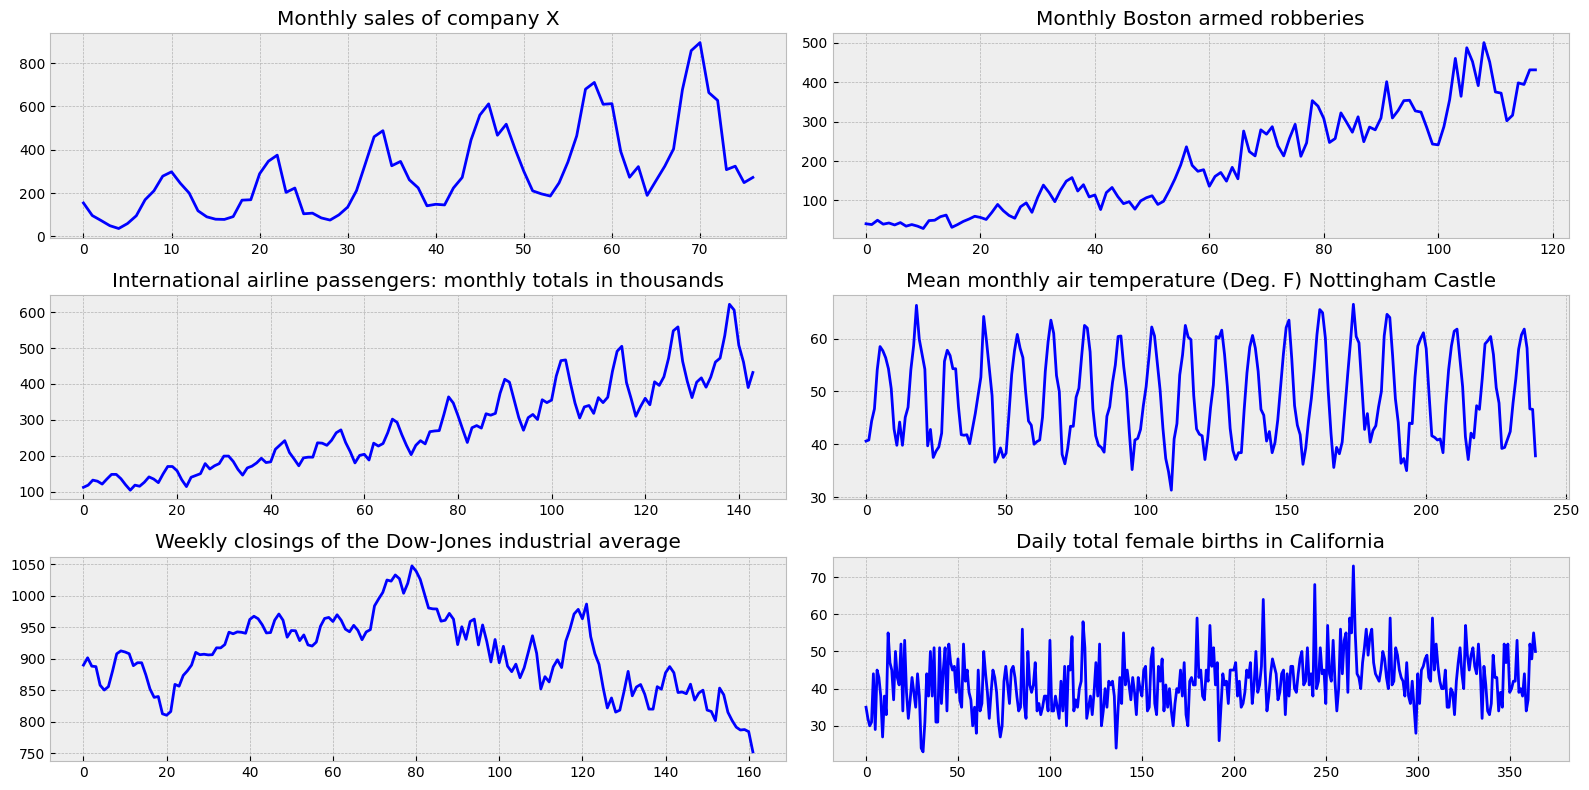

In [21]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

Из графиков ближе всего походит на шум "Daily total female births in California"

In [70]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
        print(dfoutput)

In [23]:
def test_stationarity(timeseries):
    # Dickey-Fuller тест
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] > 0.05:
      print("Ряд не стационарен")
    else:
      print("Ряд стационарен")

In [24]:
for key,  i in all_series.items():
  print("----------------------------------")
  print( key , test_stationarity(i))


----------------------------------
ADF Statistic: 0.6547150829524446
p-value: 0.9888894205170052
Critical Values:
	1%: -3.537
	5%: -2.908
	10%: -2.591
Ряд не стационарен
Monthly sales of company X None
----------------------------------
ADF Statistic: 1.001102140245781
p-value: 0.994277563805723
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582
Ряд не стационарен
Monthly Boston armed robberies None
----------------------------------
ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Ряд не стационарен
International airline passengers: monthly totals in thousands None
----------------------------------
ADF Statistic: -3.2554924030863366
p-value: 0.016989030222608604
Critical Values:
	1%: -3.460
	5%: -2.874
	10%: -2.574
Ряд стационарен
Mean monthly air temperature (Deg. F) Nottingham Castle None
----------------------------------
ADF Statistic: -1.3146254984911683
p-value: 0.6224548515589733
Critical Values:
	1%: -3.472


Как видим 4 временных рядов из 6 не стационарны.

In [62]:
series_mothly = boxcox(all_series["Monthly sales of company X"] , 0)

In [57]:
test_stationarity(series_mothly)

ADF Statistic: -0.9080489952107124
p-value: 0.7853102124849111
Critical Values:
	1%: -3.537
	5%: -2.908
	10%: -2.591
Ряд не стационарен


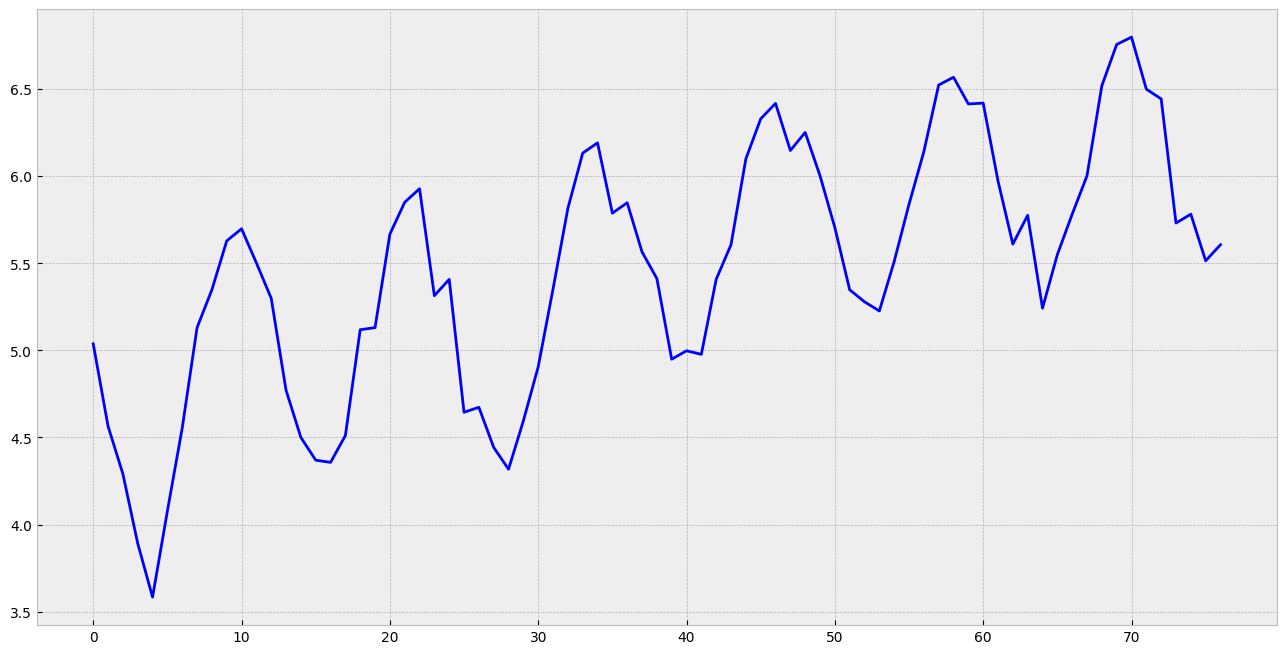

In [56]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_mothly, color='blue')

тренд и сезонность остались да и p-value > 0.05. Продиффиренцируем

In [63]:

series_mothly = np.diff(series_mothly, 1)

In [64]:
test_stationarity(series_mothly)

ADF Statistic: -3.135643801006635
p-value: 0.024025392839875176
Critical Values:
	1%: -3.537
	5%: -2.908
	10%: -2.591
Ряд стационарен


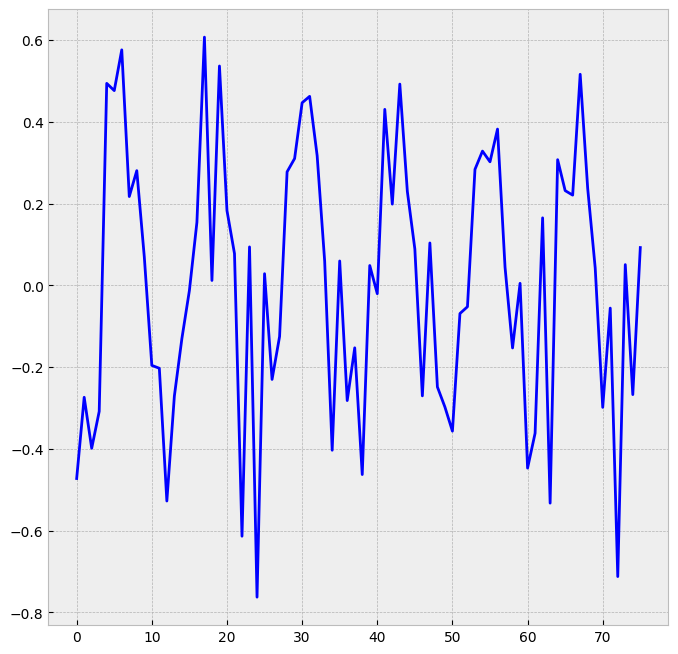

In [66]:
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 8))
        plt.plot(series_mothly, color='blue')

Ряд стал стационарным

In [ ]:
# Monthly Boston armed robberies None

In [67]:
series_boston = np.diff(all_series["Monthly Boston armed robberies"], 1)

In [68]:
test_stationarity(series_mothly)

ADF Statistic: -3.135643801006635
p-value: 0.024025392839875176
Critical Values:
	1%: -3.537
	5%: -2.908
	10%: -2.591
Ряд стационарен


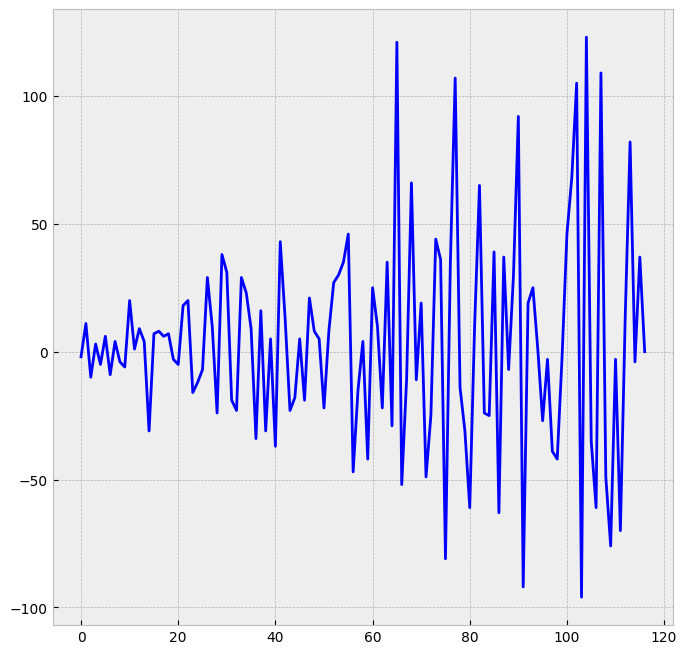

In [69]:
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 8))
        plt.plot(series_boston, color='blue')

Ряд стал стационарным

In [75]:
series_International = boxcox(all_series["International airline passengers: monthly totals in thousands"] , 0)

In [76]:
test_stationarity(series_International)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
dtype: float64
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
dtype: float64
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [77]:
#International airline passengers: monthly totals in thousands None
series_International = np.diff(series_International, 1)

In [78]:
test_stationarity(series_International)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
dtype: float64
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
dtype: float64
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


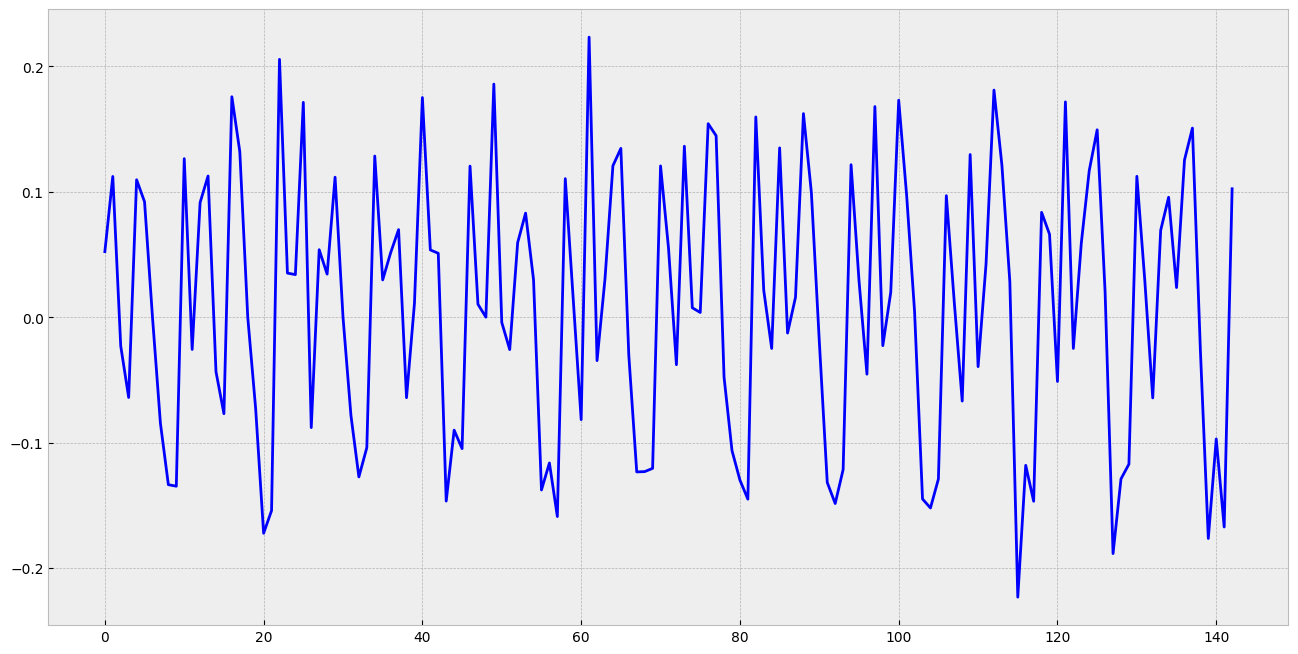

In [80]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_International, color='blue')

Наблюдаем некоторую сезонность порядка 12

In [81]:
series_International = series_International[12:] - series_International[:-12]

In [82]:
test_stationarity(series_International)

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
dtype: float64
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
dtype: float64
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


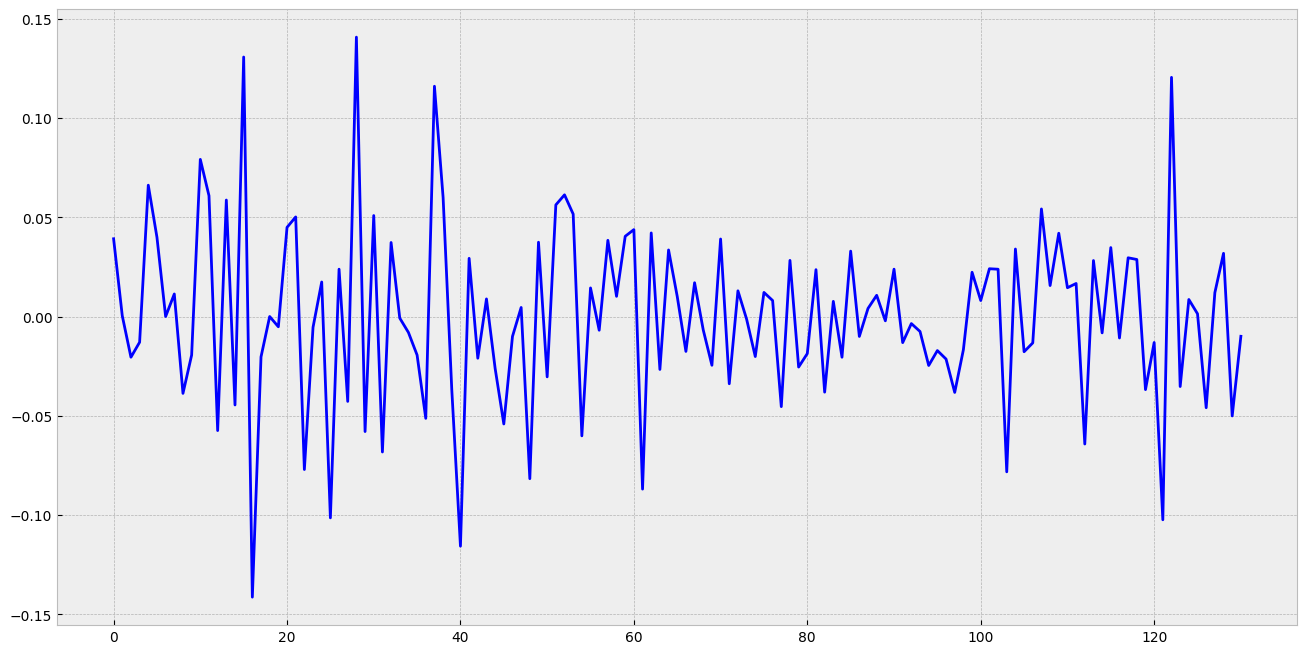

In [83]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_International, color='blue')

Ряд стал стационарен

In [84]:
# Weekly closings of the Dow-Jones industrial average None

series_Weekly = np.diff(all_series["Weekly closings of the Dow-Jones industrial average"], 1)

In [85]:
test_stationarity(series_Weekly)

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
dtype: float64
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
dtype: float64
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


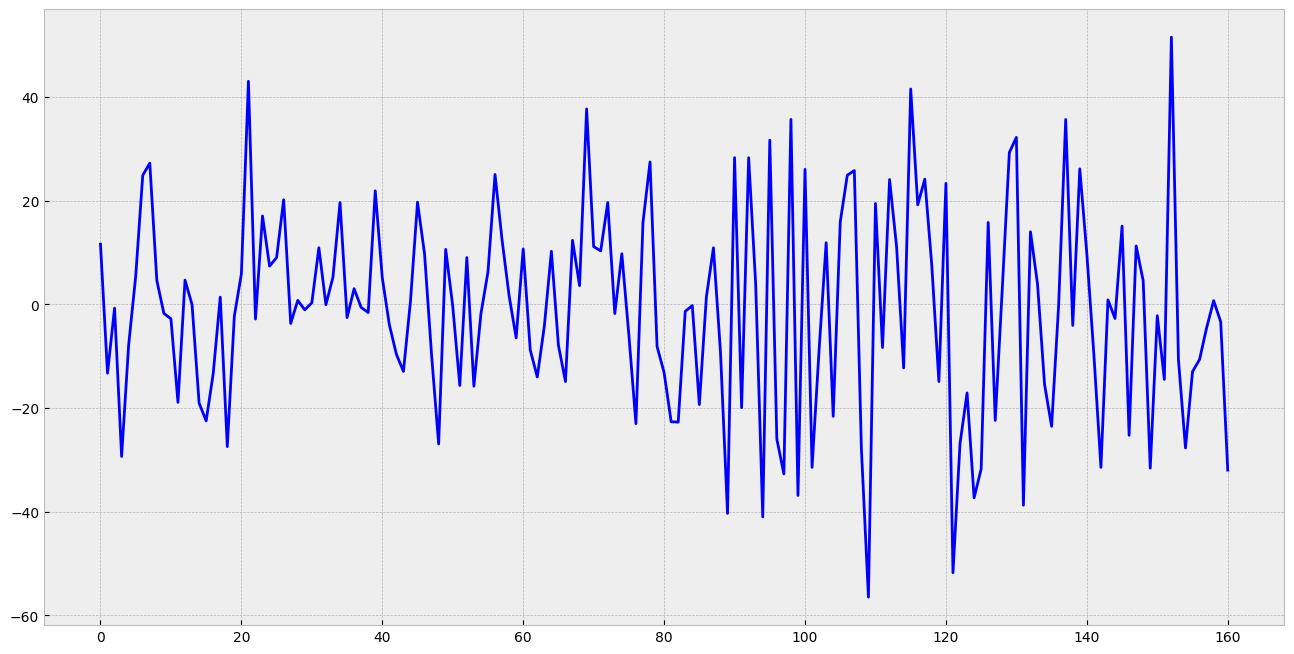

In [86]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_Weekly, color='blue')

Ряд стал стационарным